<a href="https://colab.research.google.com/github/indhra007/neural-network/blob/master/nn_bosto_house_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [16]:
#Variables
dataset=np.loadtxt("car.csv", delimiter=",")
x=dataset[:,0:5]
y=dataset[:,5]
y=np.reshape(y, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [0]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [18]:
model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [20]:
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 577 samples, validate on 145 samples
Epoch 1/150
577/577 [==============================] - 0s 436us/sample - loss: 0.2411 - mean_squared_error: 0.2411 - mean_absolute_error: 0.3875 - val_loss: 0.1778 - val_mean_squared_error: 0.1778 - val_mean_absolute_error: 0.3179
Epoch 2/150
577/577 [==============================] - 0s 39us/sample - loss: 0.1767 - mean_squared_error: 0.1767 - mean_absolute_error: 0.3178 - val_loss: 0.1330 - val_mean_squared_error: 0.1330 - val_mean_absolute_error: 0.2667
Epoch 3/150
577/577 [==============================] - 0s 38us/sample - loss: 0.1301 - mean_squared_error: 0.1301 - mean_absolute_error: 0.2704 - val_loss: 0.0959 - val_mean_squared_error: 0.0959 - val_mean_absolute_error: 0.2329
Epoch 4/150
577/577 [==============================] - 0s 40us/sample - loss: 0.0916 - mean_squared_error: 0.0916 - mean_absolute_error: 0.2380 - val_loss: 0.0688 - val_mean_squared_error: 0.0688 - val_mean_absolute_error: 0.2132
Epoch 5/150
577/577 [============

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


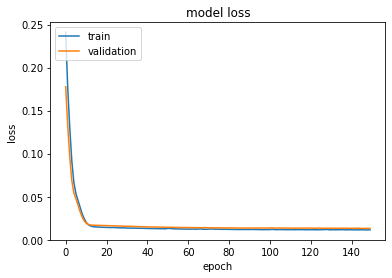

In [21]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
Xnew = np.array([[40, 0, 26, 9000, 8000]])

In [23]:
Xnew = np.array([[40, 0, 26, 9000, 8000]])
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)
#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[  40.    0.   26. 9000. 8000.], Predicted=[14238.244]
